<h1 style="font-weight: bold; font-size: 30px;">Activity Type Clustering using a Gaussian Mixture Model</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.mixture import GaussianMixture

In [3]:
space_weather_df = pd.read_csv('Space_Weather.csv')
print(space_weather_df.columns)
dtype = {
    'BSRN': 'float32', 
    'ND': 'float32', 
    'KP_SUM': 'float32', 
    'AP_AVG': 'float32',
    'CP': 'float32', 
    'C9': 'float32', 
    'ISN': 'float32', 
    'F10.7_OBS': 'float32',
    'F10.7_ADJ': 'float32', 
    'F10.7_OBS_CENTER81': 'float32', 
    'F10.7_OBS_LAST81': 'float32',
    'F10.7_ADJ_CENTER81': 'float32', 
    'F10.7_ADJ_LAST81': 'float32',
    'F10.7_DATA_TYPE': 'category',
    'Geomagnetic_Storm': 'category',
    'Solar_Flare_Detection': 'int32',
    'Activity_Type': 'category'
}
space_weather_df['DATE'] = pd.to_datetime(space_weather_df['DATE'], dayfirst=True)
space_weather_df = space_weather_df.astype(dtype)

Index(['DATE', 'BSRN', 'ND', 'KP_SUM', 'AP_AVG', 'CP', 'C9', 'ISN',
       'F10.7_OBS', 'F10.7_ADJ', 'KP1', 'AP1', 'KP2', 'AP2', 'KP3', 'AP3',
       'KP4', 'AP4', 'KP5', 'AP5', 'KP6', 'AP6', 'KP7', 'AP7', 'KP8', 'AP8',
       'F10.7_OBS_CENTER81', 'F10.7_OBS_LAST81', 'F10.7_ADJ_CENTER81',
       'F10.7_ADJ_LAST81', 'F10.7_DATA_TYPE', 'Geomagnetic_Storm',
       'Solar_Flare_Detection', 'Activity_Type'],
      dtype='object')


In [4]:
print(space_weather_df.head())

        DATE  BSRN        ND    KP_SUM    AP_AVG        CP        C9  \
0 2000-01-01  0.42  0.462380  0.499399  0.960782  0.648720  0.144274   
1 2000-01-02  0.58  0.430591  0.932934  0.078520  0.558700  0.469506   
2 2000-01-03  0.32  0.490096  0.212742  0.281228  0.613091  0.975808   
3 2000-01-04  0.52  0.483932  0.364209  0.494099  0.887551  0.247206   
4 2000-01-05  0.64  0.253961  0.329851  0.170308  0.868245  0.703101   

        ISN   F10.7_OBS   F10.7_ADJ  ...       KP8        AP8  \
0  0.412698  104.100136  137.692459  ...  0.151015  67.191521   
1  0.349206  116.006523   95.218697  ...  2.696456   3.577513   
2  0.507937  144.873810   94.712036  ...  3.953092  57.538329   
3  0.666667  129.061905  166.211365  ...  4.916377  41.797592   
4  0.507937  150.901627  120.484367  ...  6.145471  23.716346   

   F10.7_OBS_CENTER81  F10.7_OBS_LAST81  F10.7_ADJ_CENTER81  F10.7_ADJ_LAST81  \
0          171.774872        151.169495           74.792542        169.436508   
1          132

In [5]:
# Converting and encoding categorical variables for probabilistic analysis
space_weather_df['DATE'] = pd.to_datetime(space_weather_df['DATE'])
space_weather_df['F10.7_DATA_TYPE'] = pd.Categorical(space_weather_df['F10.7_DATA_TYPE'])
space_weather_df['Geomagnetic_Storm'] = pd.Categorical(space_weather_df['Geomagnetic_Storm'])
space_weather_df['Activity_Type'] = LabelEncoder().fit_transform(space_weather_df['Activity_Type'])

# Defining features to normalize
features_to_normalize = ['BSRN', 'ND', 'KP_SUM', 'AP_AVG', 'CP', 'C9', 'ISN', 'F10.7_OBS', 'F10.7_ADJ']


In [8]:
# Focusing on 'Activity_Type' for clustering
X_reg = space_weather_df[features_to_normalize]
y_reg = space_weather_df['Activity_Type']

# Normalizing numerical features
scaler = StandardScaler()
X_reg.loc[:, features_to_normalize] = scaler.fit_transform(X_reg.loc[:, features_to_normalize])
features_scaled = scaler.fit_transform(space_weather_df[features_to_normalize])

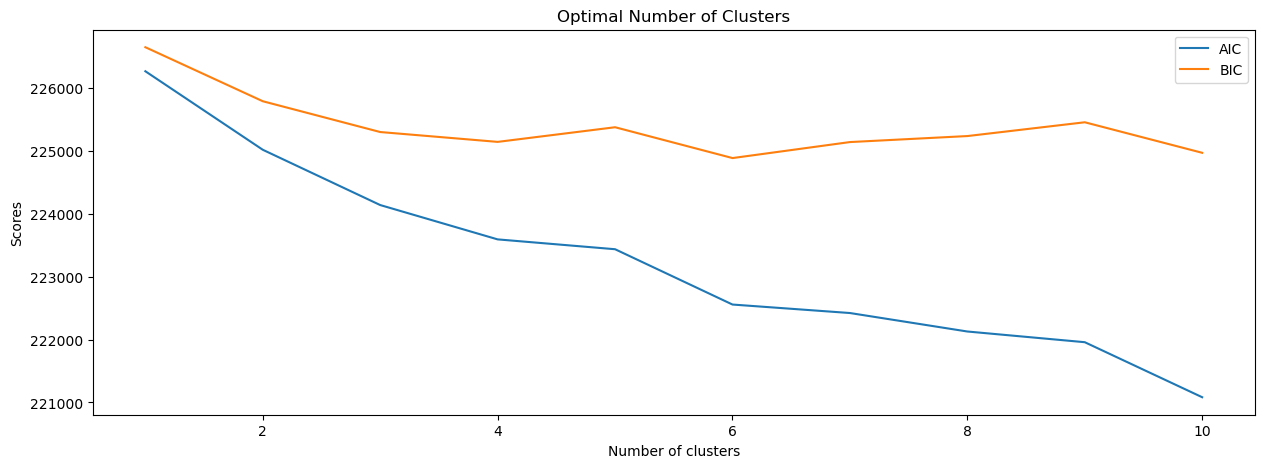

In [9]:
# Automated approach to find the optimal number of clusters using Gaussian Mixture Models
n_components = range(1, 11)
models = [GaussianMixture(n_components=n, covariance_type='full', random_state=0).fit(features_scaled) for n in n_components]

# Using AIC and BIC to find the optimal number of clusters
aics = [model.aic(features_scaled) for model in models]
bics = [model.bic(features_scaled) for model in models]

plt.figure(figsize=(15, 5))
plt.plot(n_components, aics, label='AIC')
plt.plot(n_components, bics, label='BIC')
plt.xlabel('Number of clusters')
plt.ylabel('Scores')
plt.legend()
plt.title('Optimal Number of Clusters')
plt.show()

In [10]:
# Automatically selecting the optimal number of clusters based on BIC
optimal_n_clusters = np.argmin(bics) + 1
gmm = GaussianMixture(n_components=optimal_n_clusters, covariance_type='full', random_state=0).fit(features_scaled)
clusters = gmm.predict(features_scaled)
space_weather_df['Cluster'] = clusters

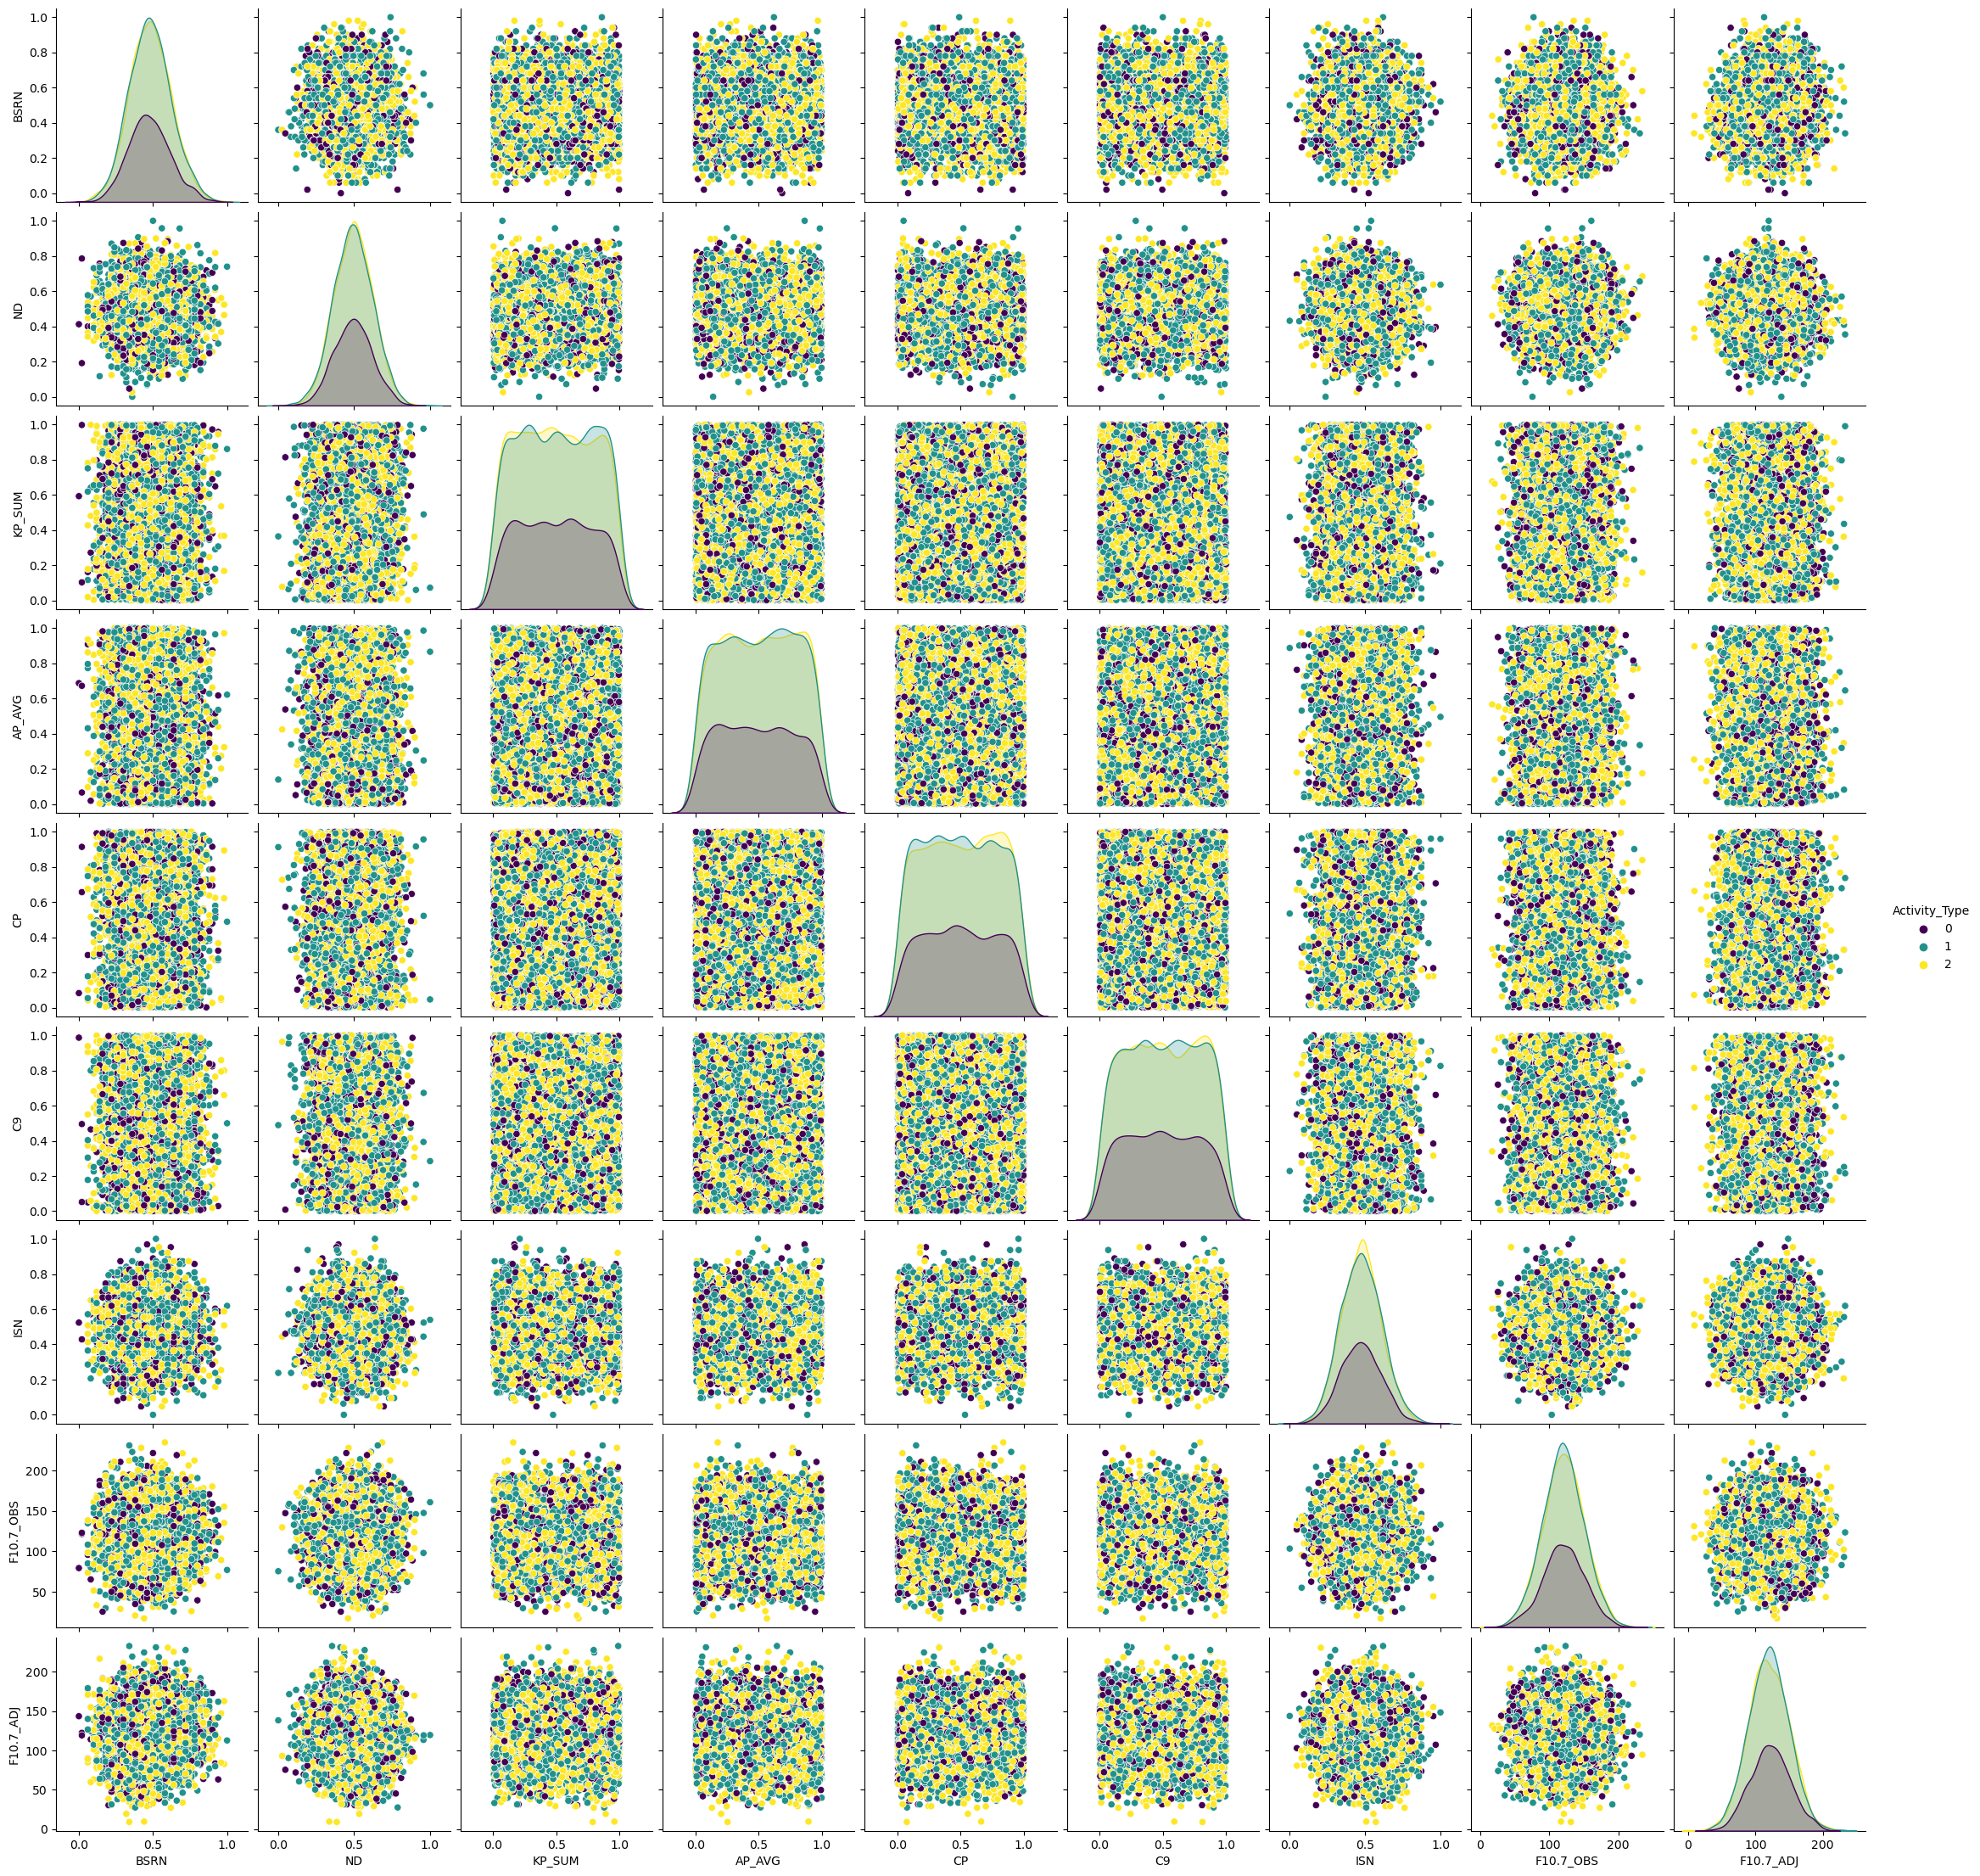

In [11]:
# Visualizing clusters based on Activity_Type
sns.pairplot(space_weather_df, vars=features_to_normalize, hue='Activity_Type', palette='viridis')
plt.show()